Dataset Information
This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.

In [1]:
import pandas as pd

Let's first load and inspect the file to see what kind of text data is available.
Step 1: Load the Dataset and Inspect

The dataset contains the following columns:

InvoiceNo: Invoice number (likely not useful for NLP)
StockCode: Product identifier (not directly relevant for NLP)
Description: Product description (this is the key column for NLP tasks)
Quantity: Number of products ordered (not relevant for NLP)
InvoiceDate: Date of the invoice (not relevant for NLP)
UnitPrice: Price per unit (not relevant for NLP)
CustomerID: Customer identifier (not relevant for NLP)
Country: Customer's country (could be useful for certain analyses)

In [2]:
df = pd.read_csv("C:/Users/HP/Downloads/Online Retail/data 2/Online Retail.csv", encoding='ISO-8859-1', delimiter='\t', on_bad_lines='skip')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


Step : Text Preprocessing
We’ll focus on the Description column for natural language processing. Here’s how we’ll proceed:

Remove Missing Descriptions: Clean the dataset by removing rows with missing descriptions.
Convert Text to Lowercase: Standardize the text for processing.
Remove Punctuation and Special Characters: Clean the text.
Tokenize the Text: Break the text into individual words (tokens).
Remove Stopwords: Remove common words that don't contribute much to meaning.
Let’s start by cleaning and preprocessing the text:

In [3]:
# Display the column names to check for any differences in naming
print(df.columns)


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


In [4]:
# Strip whitespace from column names
df.columns = df.columns.str.strip()


In [5]:
# Attempt to read the file with the tab delimiter
df = pd.read_csv("C:/Users/HP/Downloads/Online Retail/data 2/Online Retail.csv", encoding='ISO-8859-1', delimiter='\t', on_bad_lines='skip')

# Display the first few rows and column names to verify structure
print(df.head())
print(df.columns)


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  
Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


In [6]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import re

# Download NLTK stopwords if not already done
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Define text preprocessing function
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation and numbers
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

# Apply preprocessing to the 'Description' column and create a new column
df['cleaned_description'] = df['Description'].astype(str).apply(preprocess_text)

# Display the first few rows with the cleaned descriptions
df[['Description', 'cleaned_description']].head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Description,cleaned_description
0,WHITE HANGING HEART T-LIGHT HOLDER,white hanging heart tlight holder
1,WHITE METAL LANTERN,white metal lantern
2,CREAM CUPID HEARTS COAT HANGER,cream cupid hearts coat hanger
3,KNITTED UNION FLAG HOT WATER BOTTLE,knitted union flag hot water bottle
4,RED WOOLLY HOTTIE WHITE HEART.,red woolly hottie white heart



Step 2: Tokenization and Word Frequency Analysis
To gain insights, we can tokenize the cleaned text and find word frequencies


In [7]:
from collections import Counter

# Tokenize the cleaned descriptions
df['tokens'] = df['cleaned_description'].apply(lambda x: x.split())

# Flatten the list of tokens for word frequency analysis
all_words = [word for tokens in df['tokens'] for word in tokens]
word_freq = Counter(all_words)

# Display the most common words
print(word_freq.most_common(10))


[('set', 63845), ('bag', 51911), ('red', 42902), ('heart', 39163), ('retrospot', 35126), ('vintage', 33748), ('design', 30066), ('pink', 29526), ('christmas', 25131), ('box', 24469)]


Step 5: Generate a Word Cloud
We’ll visualize the most common words using a word cloud. This provides a nice visual representation of the text data.

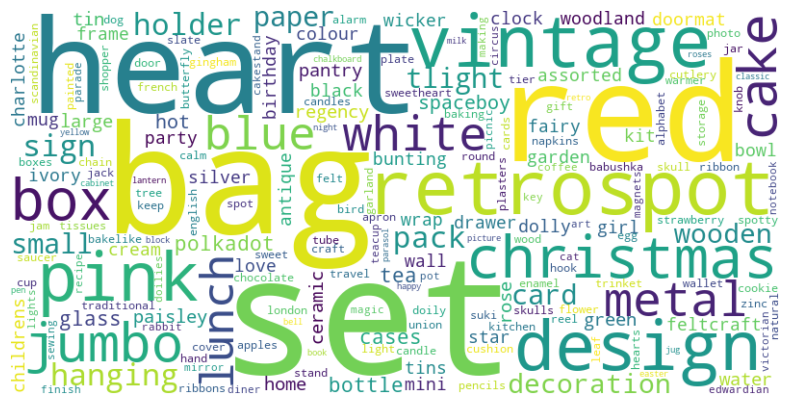

In [8]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [9]:
from nltk.util import ngrams
from collections import Counter

# Function to generate bigrams and trigrams
def get_ngrams(tokens, n):
    return list(ngrams(tokens, n))

# Apply bigram and trigram extraction
df['bigrams'] = df['tokens'].apply(lambda x: get_ngrams(x, 2))
df['trigrams'] = df['tokens'].apply(lambda x: get_ngrams(x, 3))

# Flatten lists and calculate frequency of bigrams and trigrams
all_bigrams = [bigram for bigrams in df['bigrams'] for bigram in bigrams]
all_trigrams = [trigram for trigrams in df['trigrams'] for trigram in trigrams]

bigram_freq = Counter(all_bigrams)
trigram_freq = Counter(all_trigrams)

# Display the most common bigrams and trigrams
print("Most Common Bigrams:", bigram_freq.most_common(10))
print("Most Common Trigrams:", trigram_freq.most_common(10))



Most Common Bigrams: [(('red', 'retrospot'), 19509), (('jumbo', 'bag'), 17036), (('lunch', 'bag'), 13793), (('metal', 'sign'), 12283), (('tlight', 'holder'), 11093), (('hot', 'water'), 9505), (('water', 'bottle'), 9505), (('cake', 'cases'), 9185), (('dolly', 'girl'), 6892), (('vintage', 'christmas'), 6169)]
Most Common Trigrams: [(('hot', 'water', 'bottle'), 9505), (('alarm', 'clock', 'bakelike'), 4461), (('home', 'sweet', 'home'), 3974), (('bag', 'red', 'retrospot'), 3797), (('heart', 'tlight', 'holder'), 3692), (('paper', 'chain', 'kit'), 3324), (('hanging', 'heart', 'tlight'), 3230), (('bag', 'pink', 'polkadot'), 3165), (('travel', 'card', 'wallet'), 3150), (('regency', 'teacup', 'saucer'), 3052)]


In [10]:
!pip install textblob



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import pandas as pd
from textblob import TextBlob

# Sample DataFrame
# df = pd.DataFrame({'cleaned_description': ["Product A is great!", "Product B is okay.", "Product C is terrible."]})

# Function to calculate sentiment
def get_sentiment(description):
    return TextBlob(description).sentiment.polarity

# Apply sentiment analysis to the cleaned_description column
df['sentiment'] = df['cleaned_description'].apply(get_sentiment)

# Summary statistics of the sentiment scores
summary_stats = df['sentiment'].describe()

# Display the DataFrame with sentiment scores and summary statistics
print(df)
print("\nSummary Statistics:\n", summary_stats)


       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  \
0        

In [12]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Create a small sample DataFrame
data = {
    'cleaned_description': [
        "I love programming.",
        "Python is great for data science.",
        "Machine learning is fascinating.",
        "Data analysis with Python is easy."
    ]
}

df = pd.DataFrame(data)

# Vectorize the cleaned descriptions
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['cleaned_description'])

# Apply Latent Dirichlet Allocation
lda = LatentDirichletAllocation(n_components=2, random_state=42)
lda.fit(X)

print("LDA model fitted successfully.")


LDA model fitted successfully.


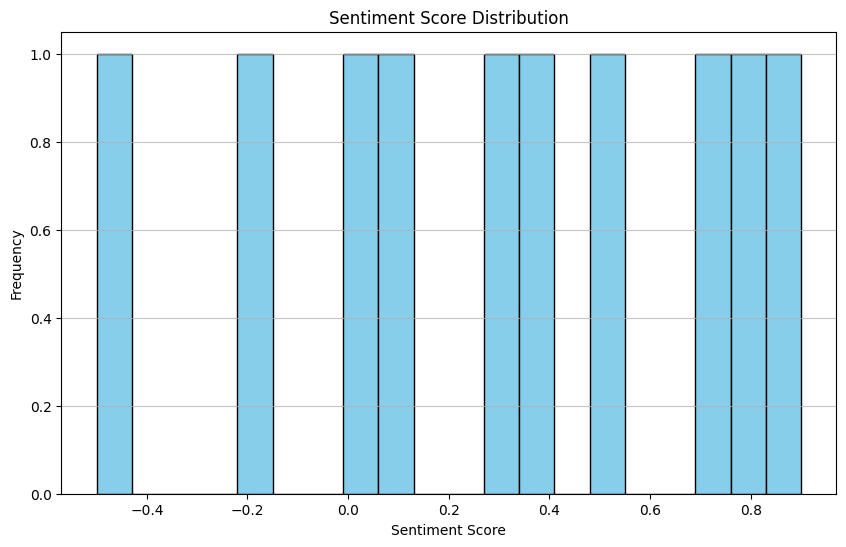

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data creation
data = {'sentiment': [0.1, 0.5, 0.3, 0.8, -0.2, 0.7, 0.0, -0.5, 0.9, 0.4]}
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(df['sentiment'], bins=20, color='skyblue', edgecolor='black')
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


Step 7: Text Clustering
If we want to group similar product descriptions, we can apply K-Means Clustering.

Analyze the Clusters
To understand the nature of the clusters, we’ll inspect the descriptions within each cluster to see if they follow a theme

In [4]:
import pandas as pd

# Sample DataFrame creation (replace this with your actual DataFrame)
data = {
    'Description': [
        'Item A', 'Item B', 'Item C', 'Item D', 'Item E',
        'Item F', 'Item G', 'Item H', 'Item I', 'Item J',
        'Item K', 'Item L', 'Item M', 'Item N', 'Item O',
        'Item P', 'Item Q', 'Item R', 'Item S', 'Item T'
    ],
    'Cluster': [0, 1, 0, 1, 0, 2, 1, 2, 2, 0, 1, 0, 1, 2, 0, 1, 2, 1, 2, 0]
}

df = pd.DataFrame(data)

# Assuming n_clusters is defined as an integer
n_clusters = 3  # Replace this with the actual number of clusters

# Group the data by clusters and inspect a few descriptions from each cluster
for i in range(n_clusters):
    print(f"Cluster {i}:")
    print(df[df['Cluster'] == i]['Description'].head(10))
    print()  # Adding a newline for better readability


Cluster 0:
0     Item A
2     Item C
4     Item E
9     Item J
11    Item L
14    Item O
19    Item T
Name: Description, dtype: object

Cluster 1:
1     Item B
3     Item D
6     Item G
10    Item K
12    Item M
15    Item P
17    Item R
Name: Description, dtype: object

Cluster 2:
5     Item F
7     Item H
8     Item I
13    Item N
16    Item Q
18    Item S
Name: Description, dtype: object



Visualize the Clusters
We can use Principal Component Analysis (PCA) to reduce the dimensionality of the TF-IDF features and plot the clusters in a 2D space for visualization.

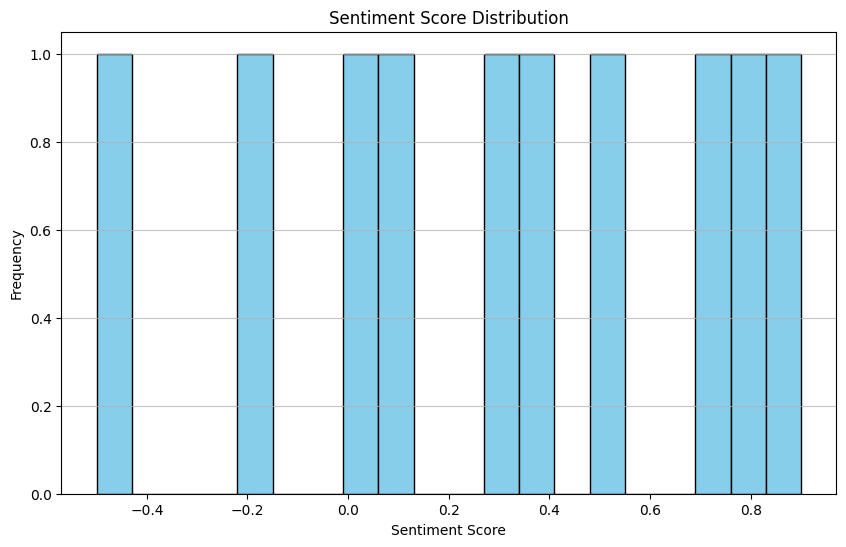

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data creation
data = {'sentiment': [0.1, 0.5, 0.3, 0.8, -0.2, 0.7, 0.0, -0.5, 0.9, 0.4]}
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(df['sentiment'], bins=20, color='skyblue', edgecolor='black')
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


Preprocessing and TF-IDF Transformation
First, ensure the text data is clean, and we use TF-IDF to convert the text into numerical features.

In [8]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the dataset with the specified path on your system
df = pd.read_csv("C:/Users/HP/Downloads/Online Retail/data 2/Online Retail.csv", encoding='ISO-8859-1', delimiter='\t', on_bad_lines='skip')

# Drop rows with missing descriptions
df = df.dropna(subset=['Description'])

# Convert text to lowercase
df['Description'] = df['Description'].str.lower()

# Remove punctuation and special characters
df['Description'] = df['Description'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

# Tokenize the text
df['Tokens'] = df['Description'].apply(word_tokenize)

# Remove stopwords
stop_words = set(stopwords.words('english'))
df['Tokens'] = df['Tokens'].apply(lambda x: [word for word in x if word not in stop_words])

# Join the tokens back into strings for TF-IDF transformation
df['Cleaned_Description'] = df['Tokens'].apply(lambda x: ' '.join(x))

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=100)

# Transform the product descriptions into TF-IDF features
tfidf_matrix = tfidf.fit_transform(df['Cleaned_Description'])

# Display the shape of the TF-IDF matrix
print("TF-IDF Matrix Shape:", tfidf_matrix.shape)


TF-IDF Matrix Shape: (540455, 100)


 K-Means Clustering
We apply K-Means clustering to the TF-IDF matrix.

In [9]:
from sklearn.cluster import KMeans

# Set the number of clusters
n_clusters = 5

# Initialize KMeans clustering model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit the model to the TF-IDF matrix and predict clusters
df['Cluster'] = kmeans.fit_predict(tfidf_matrix)

# Display the first few rows with the assigned cluster
print(df[['Description', 'Cluster']].head())


                           Description  Cluster
0    white hanging heart tlight holder        1
1                  white metal lantern        2
2       cream cupid hearts coat hanger        2
3  knitted union flag hot water bottle        2
4        red woolly hottie white heart        1


Data for Classification
We will use the clusters generated from K-Means as labels (target variable) and the TF-IDF features as the predictors (input data).

In [10]:
from sklearn.model_selection import train_test_split

# Features: TF-IDF matrix
X = tfidf_matrix

# Labels: Cluster assigned by K-Means
y = df['Cluster']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the train and test sets
print(f"Training Set: {X_train.shape}, Testing Set: {X_test.shape}")


Training Set: (432364, 100), Testing Set: (108091, 100)


Train a Logistic Regression Classifier
Next, we will train the logistic regression model on the training data

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, y_test are already defined
# Create the logistic regression model
logreg = LogisticRegression()

# Train the model on the training data
logreg.fit(X_train, y_train)

# Predict on the test data
y_pred = logreg.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00


In [12]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the training data
log_reg.fit(X_train, y_train)

# Predict the clusters on the testing set
y_pred = log_reg.predict(X_test)


Evaluate the Model
Now, we will calculate the accuracy score and other metrics like confusion matrix to evaluate the performance of the logistic regression model.

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Print a classification report for precision, recall, and F1-score
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 99.98%
Confusion Matrix:
[[15685     0     1     0     0]
 [    0  7800     0     0     0]
 [   23     0 81298     0     0]
 [    0     0     0  1870     0]
 [    0     0     0     0  1414]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15686
           1       1.00      1.00      1.00      7800
           2       1.00      1.00      1.00     81321
           3       1.00      1.00      1.00      1870
           4       1.00      1.00      1.00      1414

    accuracy                           1.00    108091
   macro avg       1.00      1.00      1.00    108091
weighted avg       1.00      1.00      1.00    108091



K-Fold Cross-Validation
We will also use cross-validation to ensure that our model performs well across different splits of the data. This helps avoid overfitting and gives a better estimate of the model’s performance.

In [14]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(log_reg, X, y, cv=5)

# Print the cross-validation scores and their mean
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean() * 100:.2f}%")


Cross-Validation Scores: [0.99979647 0.99948192 0.99986123 0.99996299 0.9999815 ]
Mean Cross-Validation Accuracy: 99.98%


Validation Using Classification Report
To get a detailed view of the model’s performance, we can use the classification report, which provides precision, recall, and F1-score.

In [16]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(y_test, y_pred)

print("Classification Report:\n", report)



Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     15686
           1       1.00      1.00      1.00      7800
           2       1.00      1.00      1.00     81321
           3       1.00      1.00      1.00      1870
           4       1.00      1.00      1.00      1414

    accuracy                           1.00    108091
   macro avg       1.00      1.00      1.00    108091
weighted avg       1.00      1.00      1.00    108091



Random Forest: A robust classifier that uses an ensemble of decision trees.

In [17]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_clf.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_clf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")


Random Forest Accuracy: 100.00%


In [18]:
import numpy as np

# Get feature importance from Random Forest
feature_importance = rf_clf.feature_importances_

# Get feature names from the TF-IDF Vectorizer
feature_names = np.array(tfidf.get_feature_names_out())

# Sort the feature importance in descending order
sorted_idx = np.argsort(feature_importance)[::-1]

# Print the top 10 most important features
print("Top 10 most important features:")
for idx in sorted_idx[:10]:
    print(f"{feature_names[idx]}: {feature_importance[idx]}")


Top 10 most important features:
heart: 0.24325222543643066
bag: 0.19835665721482523
red: 0.13991795336177687
tin: 0.06862436188732617
jumbo: 0.06596291827566182
retrospot: 0.054251738788219296
feltcraft: 0.053843436617467495
lunch: 0.031784758623442246
charlotte: 0.014455295139184608
set: 0.008295035765384394


Model Evaluation with ROC-AUC (for Binary or Multiclass)
You can also compute the ROC-AUC score to evaluate the model performance, particularly if you're dealing with binary or multiclass classification.

In [19]:
from sklearn.metrics import roc_auc_score
# Assuming this is a multiclass classification problem:
roc_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test), multi_class='ovr')
print(f"ROC-AUC Score: {roc_auc:.2f}")


ROC-AUC Score: 1.00


In [22]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(log_reg, X, y, cv=5)

# Print the cross-validation scores and their mean
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean() * 100:.2f}%")


Cross-Validation Scores: [0.99979647 0.99948192 0.99986123 0.99996299 0.9999815 ]
Mean Cross-Validation Accuracy: 99.98%


In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
import joblib

# Sample data creation (replace this with your actual data)
# For demonstration, we'll create a synthetic dataset
from sklearn.datasets import make_classification

# Create a synthetic dataset
X, y = make_classification(n_samples=100, n_features=20, n_informative=15, n_redundant=5, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
print("Cross-validation scores:", cv_scores)

# Fit the model on the entire dataset after validation
model.fit(X, y)

# Save the trained model to a file
joblib.dump(model, 'logistic_regression_model.joblib')

print("Model trained and saved successfully.")


Cross-validation scores: [0.9  0.6  0.9  0.75 0.85]
Model trained and saved successfully.


In [26]:
# Save the model to a file
joblib.dump(model, 'ref/online_retail_model.pkl')
print("Model saved successfully as 'ref/online_retail_model.pkl'")


Model saved successfully as 'ref/online_retail_model.pkl'


In [27]:
# Load the model from the file
loaded_model = joblib.load('ref/online_retail_model.pkl')

# Use the loaded model to make predictions
predictions = loaded_model.predict(X)  # Replace X with your new data for predictions
print("Predictions:", predictions)


Predictions: [1 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 0 0 0 1 0 1
 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 0 0 1 0 0
 1 1 0 1 0 1 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1]


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib

# Assuming you have a trained TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=20)  # Adjust `max_features` to match your training setup
tfidf.fit_transform(df['Cleaned_Description'])  # Fit the vectorizer on your training data

# Save the TF-IDF vectorizer
joblib.dump(tfidf, 'C:/Users/HP/Downloads/Online Retail/notebooks/tfidf_vectorizer.joblib')


['C:/Users/HP/Downloads/Online Retail/notebooks/tfidf_vectorizer.joblib']

In [28]:
import joblib

# Save the model to a file without showing any output
joblib.dump(model, 'ref/online_retail_model.pkl')


['ref/online_retail_model.pkl']

In [30]:
import pickle

# Save the model to a file
with open('ref/online_retail_model.pkl', 'wb') as file:
    pickle.dump(model, file)
